# Image Classification with PyTorch
### *MNIST Dataset*

---

## Welcome to the third lab of Deep Learning!

In the previous lecture, you have been introduced to Convolution Neural Networks. In this lab, we will see how we can **build our own CNN** for processing images with the **torchvision from Pytorch**.

By the end of this lab, you will be able to:
- import the relevant classes from PyTorch
- design the architecture of a custom CNN.
- create image and data generators
- perform data augmentation
- fit a CNN and assess its performance

# Predicting Hand-Written Digits (multi-class classification)

## Dataset

The dataset we will be using is the famous MNIST.

The data was originally published by Professor Dr. Hans Hofmann
Institut f"ur Statistik und "Okonometrie
Universit"at Hamburg
FB Wirtschaftswissenschaften
Von-Melle-Park 5
2000 Hamburg 13

Each observation is an black and white image of size 28 by 28 representing a single hand-written digit.

This dataset is avalaible from Kaggle: [MNIST](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)

## Objective

Our goal is to build a Convolution Neural Network model that can predict accurately the hand-written digit from an image.

## Instructions

This is a guided exercise where some of the code have already been pre-defined. Your task is to fill the remaining part of the code (it will be highlighted with placehoders) to train and evaluate your model.

This exercise is split in several parts:
1.   Loading and Exploration of the Dataset
2.   Preparing the Dataset
3.   Defining the CNN Architecture:
    - Convolutional layer with input channel 1, output channel 32 and kernels of (3,3)
    - Max pooling of (2,2)
    - Convolutional layer with input channel 32, output channel 64 and kernels of (3,3)
    - Max pooling of (2,2)
    - Fully-connected layer of 128 units
    - Fully-connected layer of 10 units
    - ReLU as the activation function for the hidden layers
    - Adam as the optimiser
4.   Training and Evaluation of the Model
5.   Analysing the Results

## Exercise 1 Solution

### 1. Loading and Exploration of the Dataset

**[1.1]** First we need to import the relevant class and libraries that contains the dataset from PyTorch and Python


In [1]:
# Solution
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

**[1.2]** Apply transformation using compose class. Use Normalize function of PyTorch (https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html) to get data data within a range and reduce skewness. The MNIST (Modified National Institute of Standards and Technology) data consists of 60,000 training images and 10,000 test images. Each image is a 28 x 28 (784 pixels) handwritten digit from "0" to "9.". For more information (https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/).

In [2]:
# Solution
# Define a transform to convert images to tensors and normalize them.
# Normalization is used to scale the pixel values to a range that helps training.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

**[1.3]** Then we will load the MNIST dataset into separate variables: train_data, test_data

In [3]:
# Solution
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

**[1.4]** Now we will divide the length of the train_data into `train_size` and `val_size` by following the ratio 70:30.

In [4]:
# Solution
total_length_train_data = len(train_data)
train_size = int(0.7 * total_length_train_data)
val_size = int(0.30 * total_length_train_data)

**[1.5]** Let's split the train data into `train_dataset` and `val_dataset` according to the given size `train_size` and `val_size` by using random_split function of PyTorch (https://pytorch.org/docs/stable/data.html).

In [5]:
# Solution
train_dataset, val_dataset = torch.utils.data.random_split(train_data, [train_size, val_size])

**[1.6]** Then display the grayscale image of train_data by calling  imshow() function of matplotlib https://www.mathworks.com/help/images/ref/imshow.html

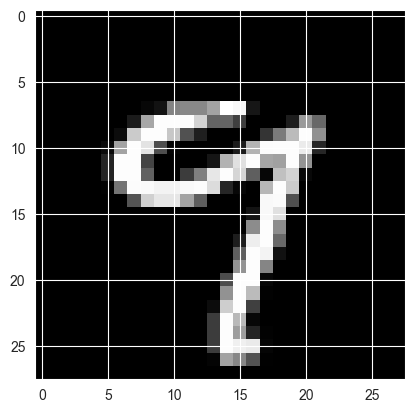

In [6]:
# Solution
plt.imshow(train_dataset[0][0][0],cmap="gray")

### 2.   Preparing the Dataset

[2.1] We already prepared the dataset in section 1.3 by using Nromalize function for training and testing sets. Now, lets have a look at the maximum value and minimum value of data train[0][0].

In [7]:
# Solution
print(train_dataset[0][0].min())
print(train_dataset[0][0].max())
print(val_dataset[0][0].min())
print(val_dataset[0][0].max())
print(test_data[0][0].min())
print(test_data[0][0].max())

tensor(-1.)
tensor(1.)
tensor(-1.)
tensor(1.)
tensor(-1.)
tensor(1.)


**[2.2]** Look at the length of train_data, val_data and test_data by using len() function of python.

In [8]:
# Solution
print(len(train_dataset))
print(len(val_dataset))
print(len(test_data))

42000
18000
10000


### 3.   Defining the Architecture of CNN

**[3.1]** Import `torch.nn` as `nn`, `torch.optim` as `optim` and other relevant packages to define the architecture of CNN

In [9]:
# Solution
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

**[3.2]** We will set the seeds for Pytorch in order to get reproducible results

In [10]:
# Solution
torch.manual_seed(168)

**[3.3]** Now we will define the model architecture. In this architecture,we will create a class named CNN_MNIST consists of 2 convolutional layers using the [Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) class from PyTorch. After the we will instantiate 2 fully-connected layers for making the
predictions.

##### Task:
1. Create 2 convolutional layers with the right number of kernels, size of kernel and activation function, Max Pooling layer with [MaxPool2D](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) that will be used after each Conv2D
2. Create 2 fully-connected lasyers and specify the right number of units and activation function

Note: the first Conv2D will be the input layer so you will need to specify the input channels.

**Task: You need to create 2 fully-connected layers with the relevant number of units and activation function.**

In [11]:
# Solution
class CNN_MNIST (nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        # First convolutional block: Conv2d -> ReLU -> MaxPool2d
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv layer: 1 input channel (grayscale), 32 output channels, 3x3 kernel
            nn.ReLU(),                                                                      # Activation function (ReLU)
            nn.MaxPool2d(2, 2),                                                             # Max pooling with kernel size 2 and stride 2
        )
        # Second convolutional block: Conv2d -> ReLU -> MaxPool2d
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1), # Conv layer: 32 input channels, 64 output channels, 3x3 kernel
            nn.ReLU(),                  # Activation function (ReLU)
            nn.MaxPool2d(2, 2),         # Max pooling with kernel size 2 and stride 2
        )
        # fully connected layer, output 10 classes
        self.fc1 = nn.Linear(64 * 7 * 7, 128)   # transforms flattened feature maps into 128 features
        self.fc2 = nn.Linear(128, 10)           # transforms 128 features into 10 output classes (digits 0-9)

    def forward(self, x):
        x = self.conv1 (x)         # Pass input through first convolutional block
        x = self.conv2(x)          # Pass output through second convolutional block
        x = x.view(x.size(0), -1)  # Flatten the feature maps into a 1D vector for each sample
        x = F.relu(self.fc1(x))    # Pass through first fully connected layer with ReLU activation
        x = self.fc2(x)            # Pass through second fully connected layer (output layer)
        return x

**[3.4]** Now save the class into a `model'. Now our architecture is ready. Lets print the model summary.

In [12]:
# Solution
model = CNN_MNIST()
print(model)

CNN_MNIST(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### 4. Training and Evaluation of the Model

**[4.1]** Instantiate a `nn.CrossEntropyLoss()` (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) and save it into a variable called `criterion`.

In [13]:
# Solution
criterion = nn.CrossEntropyLoss() #loss function (CrossEntropyLoss for multi-class classification)

**[4.2]**  Instantiate a `torch.optim.Adam()` optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called `optimizer`

In [14]:
# Solution
optimizer = optim.Adam(model.parameters(), lr = 0.001)

**[4.3]**  Now we will call the DataLoader function that iteratively loads data based on batch size, and save it into two different variables called `train_dataloader`, `val_dataloader` and `test_dataloader`. Set the `batch_size` to 64.

In [15]:
# Solution
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

**[4.4]** **Training:** Now it is time to train our model. Set the `EPOCHS` to 5 and create a for loop that will iterate based on the EPOCHS value. A nested loop is initiated that extracts data and target from train_dataloader and introduce the following logics:
- reset the gradients
- perform the forward propagation and get the model predictions
- calculate the loss between the predictions and the actuals
- perform back propagation
- update the weights
- Count the total loss

To validate the model a nested loop is initiated that extracts images and labels from `val_dataloader` and introduce the following logics:
- disable computing gradients (https://pytorch.org/docs/stable/generated/torch.no_grad.html)
- perform the forward propagation and get the model predictions
- calculate the loss between the predictions and the actuals
- Count the total loss
- Count the correct outcome

In [16]:
# Solution
# Training the model
epochs = 5
losses = []             # List to store individual batch losses
train_losses = []       # Average loss per epoch for training
train_accuracies = []   # Training accuracy per epoch
val_losses = []         # Average loss per epoch for validation
val_accuracies = []     # Validation accuracy per epoch

for epoch in range(epochs):
    loss_count = 0.0      # Accumulate training loss for the current epoch
    correct_train = 0     # Count of correct predictions in training
    total_train = 0       # Total number of training samples processed
    for images, labels in train_dataloader:
        predicted_outputs = model(images)             # Forward Propagation to get predicted outcome
        loss = criterion(predicted_outputs, labels)   # Compute the loss
        losses.append(loss.detach().numpy())          # Keep track of the losses
        optimizer.zero_grad()                         # clear gradients for this training step
        loss.backward()                               # Back propagation
        optimizer.step()                              # Update the weights
        loss_count += loss.item()                     # Accumulate training loss

        _, predicted = torch.max(predicted_outputs, 1)        # Get predicted classes
        total_train += labels.size(0)                         # Increment the total number of samples processed in the training dataset
        correct_train += (predicted == labels).sum().item()   # Count correct predictions

    train_losses.append (loss_count/len(train_dataloader))  # Append the training loss
    train_accuracies.append(correct_train/total_train)      # Append the training accuracy

    # Validation Part
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    # Disable gradient computation during validation
    with torch.no_grad():
        for images, labels in val_dataloader:
            predicted_outputs = model(images) # Forward Propagation to get predicted outcome
            loss = criterion(predicted_outputs, labels)  # Compute the loss for validation data
            val_loss += loss.item()  # Accumulate validation loss

            _, predicted = torch.max(predicted_outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_dataloader))  # Store validation loss
    val_accuracies.append(correct_val / total_val) # Store validation accuracy

    # Printing the Results
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2%}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.2%}")

Epoch 1/5, Train Loss: 0.1898, Train Accuracy: 94.20%, Validation Loss: 0.0621, Validation Accuracy: 98.18%
Epoch 2/5, Train Loss: 0.0536, Train Accuracy: 98.30%, Validation Loss: 0.0475, Validation Accuracy: 98.57%
Epoch 3/5, Train Loss: 0.0344, Train Accuracy: 98.88%, Validation Loss: 0.0449, Validation Accuracy: 98.60%
Epoch 4/5, Train Loss: 0.0251, Train Accuracy: 99.19%, Validation Loss: 0.0436, Validation Accuracy: 98.62%
Epoch 5/5, Train Loss: 0.0193, Train Accuracy: 99.39%, Validation Loss: 0.0497, Validation Accuracy: 98.54%


**[4.5]** **Testing:** Now it is time to test our model. Initiate the `model.eval()` along with `torch.no_grad()` to turn off the gradients. Finally calculate the total and correct value. If the predicted output equals the actual output then count the correct value.

In [17]:
# Solution
# Evaluate the model on the test set
model.eval()    # Set the model to evaluation mode (disables dropout, etc.)
correct = 0
total = 0
# Get the predictions for the test dataset
predicted_labels = []
true_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model(images)                           # get the predicted outcome
        predicted = torch.max(outputs, 1)[1].squeeze()    # Determine predicted classes
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())


### 5. Analysing the Results

**[5.1]** Let's calculate the `accuracy` of the model by dividing the correct value with the total value and print the `accuracy`.

In [18]:
# Solution
accuracy = correct / total
print(f"Accuracy on the test set: {accuracy:.2%}")

Accuracy on the test set: 98.82%


**[5.2]** Let's plot the training and validation losses based on `train_losses` and `val_losses`.

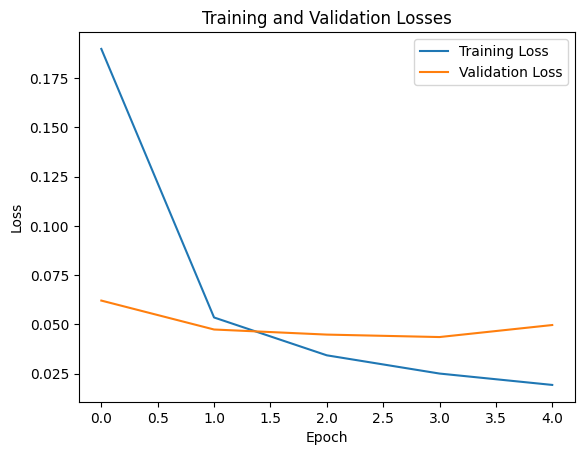

In [19]:
# Solution
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

**[5.3]** Let's plot the training and validation accuracies based on `train_accuracies` and `val_accuracies`.

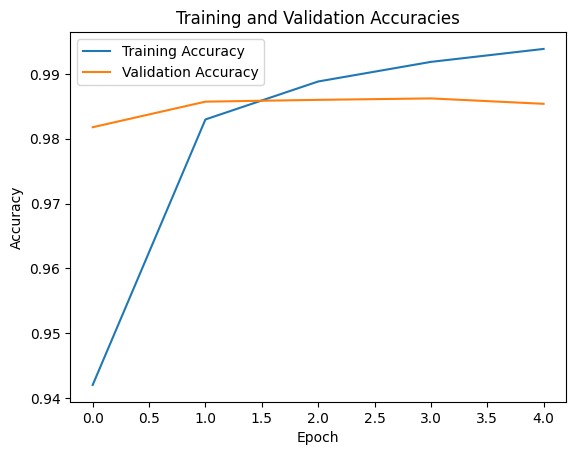

In [20]:
# Solution
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

**[5.4]** Now we can calculate the confusion matrix using the [confusion_matrix()] (https://pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html) method from PyTorch.

In [21]:
# Solution
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

**[5.5]** Let's plot the confusion matrix.

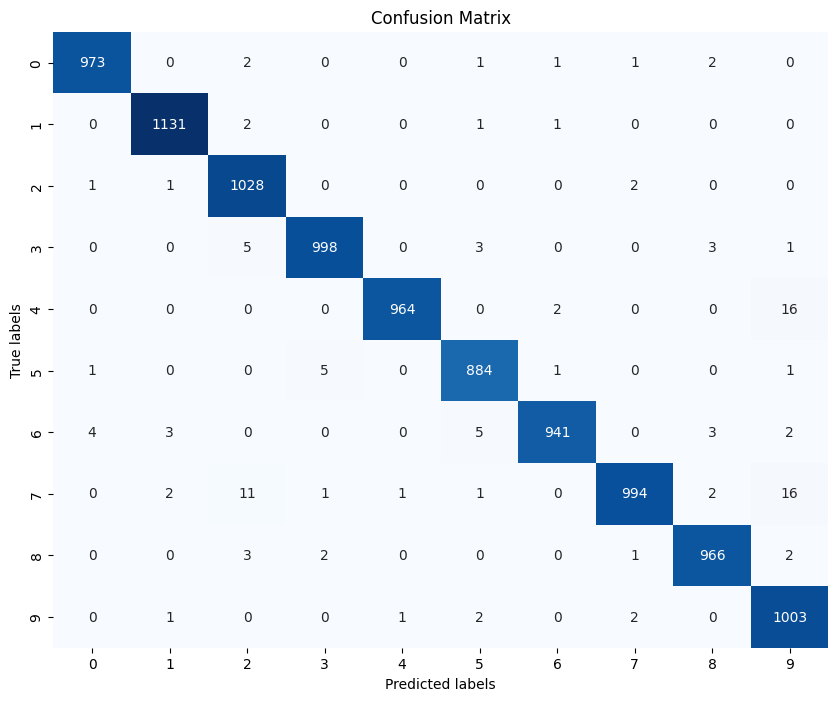

In [22]:
# Solution
# Import the packages for plotting the graph
import seaborn as sns
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**[5.6]** Get some random training images by using next(iter(dataloader)) [https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html]

In [23]:
# Solution
dataiter = iter(test_dataloader)
imags, labls = next(dataiter)

**[5.7]** Let's access the first 10 data from test data and save it to actual_data.

In [24]:
# Solution
actual_data = labls[:10].numpy()
actual_data

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

**[5.8]** Let's compare this prediction to the actual true value

In [25]:
# Solution
outputs = model(imags[:10])
predicted_data = torch.max(outputs, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {predicted_data}')
print(f'Actual number: {actual_data}')

Prediction number: [7 2 1 0 4 1 4 9 5 9]
Actual number: [7 2 1 0 4 1 4 9 5 9]
